<i><b>CNN</b></i><br>
--
Coded by : Nub-T<br>
Here is the data <a href="https://www.kaggle.com/chetankv/dogs-cats-images">link</a>

In [1]:
import numpy as np
import cv2
import os
import time

import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense,Activation
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import warnings as wrn

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
train_dog_path = '../input/dogs-cats-images/dataset/training_set/dogs'
train_cat_path = '../input/dogs-cats-images/dataset/training_set/cats'

test_dog_path = '../input/dogs-cats-images/dataset/test_set/dogs'
test_cat_path = '../input/dogs-cats-images/dataset/test_set/cats'

train_dog_paths = [os.path.join(train_dog_path,image) for image in os.listdir(train_dog_path)]
train_cat_paths = [os.path.join(train_cat_path,image) for image in os.listdir(train_cat_path)]

test_dog_paths = [os.path.join(test_dog_path,image) for image in os.listdir(test_dog_path)]
test_cat_paths = [os.path.join(test_cat_path,image) for image in os.listdir(test_cat_path)]

for path in train_cat_paths[:4]:
    print(path)

../input/dogs-cats-images/dataset/training_set/cats/cat.2271.jpg
../input/dogs-cats-images/dataset/training_set/cats/cat.728.jpg
../input/dogs-cats-images/dataset/training_set/cats/cat.472.jpg
../input/dogs-cats-images/dataset/training_set/cats/cat.2725.jpg


In [4]:
IM_SIZE = 150

start_time = time.time()

x_train = []
x_test = []
y_train = []
y_test = []

for image in train_dog_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_train.append(im)
        y_train.append(0)
    except:
        print("Something wrong happened when reading this file {}".format(image))

for image in train_cat_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_train.append(im)
        y_train.append(1)
    except:
        print("Something wrong happened when reading this file {}".format(image))

for image in test_dog_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_test.append(im)
        y_test.append(0)
    except:
        print("Something wrong happened when reading this file {}".format(image))

for image in test_cat_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_test.append(im)
        y_test.append(1)
    except:
        print("Something wrong happened when reading this file {}".format(image))

x_train,x_test,y_train,y_test = np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)
        
end_time = time.time()
print("Reading and resizing images took {} minutes. ".format(round((end_time-start_time)/60),2)) 

Reading and resizing images took 1 minutes. 


In [5]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=1)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_val.shape)
print(y_val.shape)

(7200, 150, 150, 3)
(7200,)
(2000, 150, 150, 3)
(2000,)
(800, 150, 150, 3)
(800,)


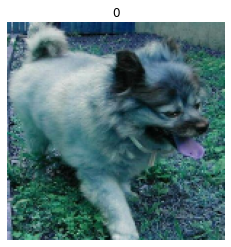

In [6]:
plt.imshow(x_train[3213])
plt.title(y_train[3213])
plt.axis("off")
plt.show()

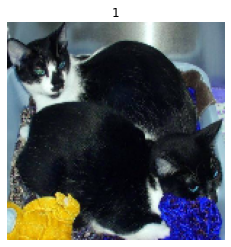

In [7]:
plt.imshow(x_train[7103])
plt.title(y_train[7103])
plt.axis("off")
plt.show()

In [8]:
datagen = ImageDataGenerator(horizontal_flip=True)

datagen.fit(x_train)

In [11]:
model = Sequential()

model.add(Conv2D(128,kernel_size=(4,4),strides=1,padding="same",input_shape=(IM_SIZE,IM_SIZE,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))

model.add(Conv2D(128,kernel_size=(4,4),strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(4,4),strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.4))

model.add(Conv2D(128,kernel_size=(4,4),strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

opt = tf.keras.optimizers.RMSprop(lr=0.01)


model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 128)     6272      
_________________________________________________________________
batch_normalization_8 (Batch (None, 150, 150, 128)     512       
_________________________________________________________________
activation_8 (Activation)    (None, 150, 150, 128)     0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 128)       262272    
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 128)      

In [12]:
BATCH_SIZE = 32
EPOCHS = 1

start_time = time.time()

model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                    epochs=EPOCHS,
                    validation_data = (x_val,y_val),
                    steps_per_epoch = x_train.shape[0] // BATCH_SIZE
                   )

end_time = time.time()
process_time = round((end_time-start_time)/60,2)

print("Fitting model {} epochs took {} minutes.".format(EPOCHS,process_time))

225/225 [==============================] - 1573s 7s/step - loss: 2.7980 - accuracy: 0.5235 - val_loss: 3.5911 - val_accuracy: 0.5163
Fitting model 1 epochs took 26.36 minutes.


In [20]:
from keras.preprocessing import image
img_width , img_height = 150,150
def fun(path):
    img = cv2.imread(path)
    im_resize = cv2.resize(img,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))


    image_pred = image.load_img(path,target_size=(img_height,img_width))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis=0)
    result = model.predict_classes(a)
    prob = model.predict_proba(a)
    print('prediction class',result)
    print('probability:{}'.format(prob[0]))
    if result[0]==0:
        prediction='Dog'
    elif result[0]==1:
        prediction='Cat'
    else:
        prediction = 'Red_Soil'
    
    
    print('predicition_class:',prediction)

prediction class [[0]]
probability:[0.00061527]
predicition_class: Dog


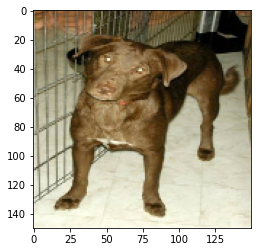

In [21]:
fun('../input/dogs-cats-images/dataset/training_set/dogs/dog.1.jpg')

prediction class [[1]]
probability:[0.998798]
predicition_class: Cat


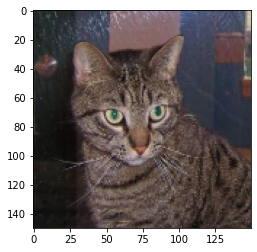

In [22]:
fun('../input/dogs-cats-images/dataset/training_set/cats/cat.1.jpg')

In [23]:
fun('../input/jagurdip/dog1.jpg')

error: OpenCV(4.4.0) /tmp/pip-req-build-dglzv4yn/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
